In [ ]:
from tensorflow.keras.datasets import mnist #Библиотека с базой Mnist
from tensorflow.keras.models import Sequential # Подлючаем класс создания модели Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout 
from tensorflow.keras.optimizers import Adam # Подключаем оптимизатор Adam
from tensorflow.keras import utils #Утилиты для to_categorical
from tensorflow.keras.preprocessing import image #Для отрисовки изображения
import numpy as np # Подключаем библиотеку numpy
import pandas as pd # Подключаем библиотеку Pandas
import pylab # Модуль для построения графиков
from mpl_toolkits.mplot3d import Axes3D # Модуль для трехмерной графики
from google.colab import files #Для загрузки своей картинки
import matplotlib.pyplot as plt #Отрисовка изображений
from PIL import Image #Отрисовка изображений
#Отрисовывать изображения в ноутбуке, а не в консоль или файл
%matplotlib inline 

# Light

Создайте модель для распознавания рукописных цифр из набора MNIST (можно воспользоваться ноутбуком 1-го занятия) и проведите ряд тестов: 

1. Запустите сеть с различными размерами обучающей и проверочной выборок: 

  a. Обучающая выборка 50.000 примеров 

  b. Обучающая выборка 10.000 примеров 

  c. Обучающая выборка 500 примеров 

2. Создайте еще два варианта сети и сравните значения точности на проверочной выборке (на  последней эпохе) и на тестовой выборке. Сделайте сравнительную таблицу. 

3. Создайте сеть следующей архитектуры: 

  a. 4 Dense слоя

  b. 3 Dropout слоя 

  c. 3 BatchNormalization слоя

Напишите свои выводы по результатам проведенных тестов. 



In [ ]:
# Загрузка данных
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data()

# Меняем формат входных картинок с 28х28 на 784х1
x_train = x_train_org.reshape(60000, 784)
x_test = x_test_org.reshape(10000, 784)

# Нормализуем данные
x_train = x_train.astype('float32') # преобразовываем x_train в тип float (цифры с плавающей точкой)
x_train = x_train / 255 # делим на 255, чтобы диапазон был от 0 до 1
x_test = x_test.astype('float32') # преобразовываем x_test в тип float (цифры с плавающей точкой)
x_test = x_test / 255 # делим на 255, чтобы диапазон был от 0 до 1

# Преобразуем ответы в формат one_hot_encoding
y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)


11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# Проверяем размеры
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [ ]:
# 1
data = []
N = [50000, 10000, 500] # Размер обучающей выборки
for i in N:

    # Задаем размер проверочной выборки
    x_val = x_train[i:int(i*1.2)] 
    y_val = y_train[i:int(i*1.2)]

    model = Sequential() 
    model.add(Dense(800, input_dim=784, activation='relu')) 
    model.add(Dense(10, activation='softmax')) 

    # Компилируем модель
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

    # Обучение сети
    model.fit(x_train[:i], y_train[:i], batch_size=128, epochs=10, verbose=1, validation_data=(x_val, y_val)) # Пееребираем размеры обучающей и проверочной выборки

    data = data + [['1-Dense', i, round(model.evaluate(x_test, y_test, verbose = 0)[1], 3)]]


# 2
model = Sequential() 
model.add(Dense(800, input_dim=784, activation='relu')) 
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax')) 

# Компилируем модель
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

# Обучение сети
model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.2)

data = data + [['1-Dense+Drop', 50000, round(model.evaluate(x_test, y_test, verbose = 0)[1], 3)]]


# 3
model = Sequential() 
model.add(Dense(800, input_dim=784, activation='relu')) 
model.add(Dropout(0.2))
model.add(Dense(200, activation='relu')) 
model.add(Dense(10, activation='softmax')) 

# Компилируем модель
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

# Обучение сети
model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.2)

data = data + [['2-Dense+Drop', 50000, round(model.evaluate(x_test, y_test, verbose = 0)[1], 3)]]

# 4
model = Sequential() 
model.add(BatchNormalization())
model.add(Dense(800, activation='relu')) 
model.add(Dropout(0.2))

model.add(BatchNormalization())
model.add(Dense(800, activation='relu')) 
model.add(Dropout(0.2))

model.add(BatchNormalization())
model.add(Dense(800, activation='relu')) 
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax')) 

# Компилируем модель
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

# Обучение сети
model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.2)

data = data + [['(BN+Dense+drop)*3', 50000, round(model.evaluate(x_test, y_test, verbose = 0)[1], 3)]]

Epoch 1/10
391/391 [==============================] - 1s 3ms/step - loss: 0.2725 - accuracy: 0.9229 - val_loss: 0.1487 - val_accuracy: 0.9579
Epoch 2/10
391/391 [==============================] - 1s 3ms/step - loss: 0.1099 - accuracy: 0.9683 - val_loss: 0.0947 - val_accuracy: 0.9719
Epoch 3/10
391/391 [==============================] - 1s 3ms/step - loss: 0.0695 - accuracy: 0.9800 - val_loss: 0.0785 - val_accuracy: 0.9771
Epoch 4/10
391/391 [==============================] - 1s 3ms/step - loss: 0.0457 - accuracy: 0.9867 - val_loss: 0.0734 - val_accuracy: 0.9781
Epoch 5/10
391/391 [==============================] - 1s 3ms/step - loss: 0.0336 - accuracy: 0.9906 - val_loss: 0.0722 - val_accuracy: 0.9781
Epoch 6/10
391/391 [==============================] - 1s 3ms/step - loss: 0.0244 - accuracy: 0.9933 - val_loss: 0.0703 - val_accuracy: 0.9791
Epoch 7/10
391/391 [==============================] - 1s 3ms/step - loss: 0.0171 - accuracy: 0.9957 - val_loss: 0.0657 - val_accuracy: 0.9815
Epoch 

In [ ]:
df = pd.DataFrame(data, columns = ['model', 'size_data','val_accuracy'])
df

,model,size_data,val_accuracy
0,1-Dense,50000,0.980
1,1-Dense,10000,0.956
2,1-Dense,500,0.846
3,1-Dense+Drop,50000,0.981
4,2-Dense+Drop,50000,0.980
5,(BN+Dense+drop)*3,50000,0.980


In [ ]:
# Выводы: 

# Pro 2 Вариант

По подготовленным на занятии данным создайте обучающую, тестовую и проверочную выборки. По
сформированным данным необходимо обучить модель для предсказания цены машины.
Оцените качество работы созданной сети, определив средний процент ошибки на проверочной
выборке. (Для этого потребуется привести предсказанные моделью значения к первоначальному
диапазону цен. Это можно сделать с помощью следующего метода:

predict_inverse = y_scaler.inverse_transfrom(predict).flatten()

где predict - результат предсказания модели).
Затем подсчитайте ошибку на каждом примере тестовой выборки и суммарный процент ошибки.
Рекмендации:

● В качестве ошибки рекомендуется использовать среднеквадратическую ошибку (mse)

● Метрику для данной задачи можно не использовать.

● Последний слой модели должен иметь 1 нейрон.

## Шаблон с ноута



In [ ]:
!unzip -q '/content/base2 (1).zip'

In [ ]:
!ls

 base2	'base2 (1).zip'   sample_data


In [ ]:
# Считываем csv с помощью pandas
cars = pd.read_csv('/content/base2/cars_new.csv', sep=',')
cars = cars.dropna() #В таблице есть строки с пустыми значениями, но их не много - всего 7
cars[:10] # Выводим первые 10 машин 

,mark,model,price,year,mileage,body,kpp,fuel,volume,power
0,kia,cerato,996000,2018,28000,седан,автомат,бензин,2.0,150.0
1,daewoo,nexia 1 поколение [2-й рестайлинг],140200,2012,60500,седан,механика,бензин,1.5,80.0
2,suzuki,jimny 3 поколение [рестайлинг],750000,2011,29000,внедорожник,автомат,бензин,1.3,85.0
3,bmw,x1 18 e84 [рестайлинг],970000,2014,49500,кроссовер,автомат,бензин,2.0,150.0
4,chevrolet,lacetti 1 поколение,205000,2007,151445,седан,механика,бензин,1.4,95.0
5,hyundai,creta 1 поколение,985000,2016,34067,кроссовер,автомат,бензин,2.0,150.0
6,kia,ceed 2 поколение,589000,2013,98000,хетчбэк,автомат,бензин,1.6,129.0
7,toyota,corolla e140,500000,2008,141000,седан,автомат,бензин,1.6,124.0
8,mercedes-benz,c-класс 180 w204/s204/c204 [рестайлинг],1320000,2015,81112,седан,автомат,бензин,1.6,156.0
9,bmw,7 серия 735 e65/e66,270000,2001,300000,седан,автомат,бензин,3.6,272.0


In [ ]:
print(cars.values.shape)

(70112, 10)


In [ ]:
def labelsToOneHot(column): #Функция для преобразования столбца данных из pandas DataFrame в OneHot
  vocab, indexes = np.array(np.unique(cars[column], return_inverse=True)) #Получаем массив уникальных значений для столбца и тот же слобец, но в виде индексов
  oneHotData = utils.to_categorical(indexes.reshape(-1, 1), num_classes = len(vocab)) #Преобразуем индексы в one-hot
  return oneHotData, vocab.tolist() #Вернем индексы в one-hot и список уникальных значений

In [ ]:
labelData = ['mark', 'model', 'body', 'kpp', 'fuel'] #Указываем столбцы с категориальными данными 
vocabulary = [] #Список для списков всех уникальных значений. Эти списки Вы сможете использовать для обратного преобразования из OneHot в категориальные данные
oneHot = [] #Список для массивов в формате OneHot для всех столбцов
for column in labelData: #Проходим по всем столбцам
  oneHotData, vocab = labelsToOneHot(column) #Получим индексы в OneHot и список уникальных значений для каждого столбца. 
  vocabulary.append(vocab) #Добавим список уникальных значений для столбца в vocabulary
  oneHot.append(oneHotData) #Добавляем в список данные oneHot
  oneHotArray = np.concatenate([i for i in oneHot], axis = 1) #Объединяем все массивы в один. 

In [ ]:
oneHotArray

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
oneHotArray.shape # Посмотрим на размер получившегося массива

(70112, 3202)

In [ ]:
for voc in vocabulary:
  print('Число уникальных элементов в', labelData[vocabulary.index(voc)], ':', len(voc))

Число уникальных элементов в mark : 21
Число уникальных элементов в model : 3156
Число уникальных элементов в body : 16
Число уникальных элементов в kpp : 4
Число уникальных элементов в fuel : 5


In [ ]:
print(vocabulary[0]) #Посмотрим на словарь марок автомобилей 
lenmarks = len(vocabulary[0]) #Подсчитаем количество всех автомобилей

['audi', 'bmw', 'chery', 'chevrolet', 'daewoo', 'ford', 'honda', 'hyundai', 'kia', 'mazda', 'mercedes-benz', 'mitsubishi', 'nissan', 'opel', 'peugeot', 'renault', 'skoda', 'subaru', 'suzuki', 'toyota', 'volkswagen']


In [ ]:
#Получим из какой-нибудь строчки всего массива подмассив, принадлежащий к марке, 
#(порядок строчек соответсвует порядку в Pandas DataFrame)
#затем переведем его в индекс класса. Можем сверить этот индекс с индексом 
#в vocabulary и убедиться, что они идентичны
np.argmax(oneHotArray[100, :lenmarks]) 
vocabulary[0][np.argmax(oneHotArray[100, :lenmarks])]

'mercedes-benz'

In [ ]:
# Запоминаем цены
prices = np.array(cars['price'], dtype=np.float)

# Запоминаем числовые параметры и нормируем
years = preprocessing.scale(cars['year'])
mileages = preprocessing.scale(cars['mileage'])
volumes = preprocessing.scale(cars['volume'])
powers = preprocessing.scale(cars['power'])

In [ ]:
years.mean()

1.0392214499056326e-14

In [ ]:
mileages.std()

1.0

In [ ]:
print(powers)

[ 0.22902799 -0.95629921 -0.87163298 ...  0.22902799 -0.75310026
  2.34568371]


In [ ]:
# Создаём пустую обучающую выборку
x_train = []
y_train = []

# Проходим по всем машинам
for _id, car in enumerate(np.array(cars)):
  # В y_train добавляем цену
  y_train.append(prices[_id])
  
  # В x_train объединяем все параметры
  # Категорийные параметры добавляем в виде ohe
  # Числовые параметры добавляем напрямую
  x_tr = oneHotArray[_id]
  x_tr = np.append(x_tr, years[_id])
  x_tr = np.append(x_tr, mileages[_id])
  x_tr = np.append(x_tr, volumes[_id])
  x_tr = np.append(x_tr, powers[_id])

  # Добавляем текущую строку в общий x_train
  x_train.append(x_tr)

# Превращаем лист в numpy.array
x_train = np.array(x_train, dtype=np.float)
y_train = np.array(y_train, dtype=np.float)

In [ ]:
# Выводим размеры выборок
print(x_train.shape)
print(y_train.shape)

(70112, 3206)
(70112,)


In [ ]:
# Выводим один x_train
print(x_train[0,:20])
print(x_train[0,-20:])

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 0.          1.          0.          0.          0.          0.
  0.          1.          0.          0.          0.          1.
  0.          0.          0.          0.          1.52001176 -1.4002026
  0.12284181  0.22902799]


In [ ]:
# Выводим y_train
print(y_train[:10])

[ 996000.  140200.  750000.  970000.  205000.  985000.  589000.  500000.
 1320000.  270000.]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.1)

In [ ]:
# Нормализуем y_train
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1,1)).flatten()

# y_train.reshape(-1,1) добавляет одну размерность
# Это нужно потому, что y_scaler.fit_transform
# Требует двумерный вектор, массив примеров, которые надо нормализовать
# Он не умеет работать с одним примером
# Поэтому мы делаем массив из одного примера
# На выходе он так же выдаёт массив примеров
# Но нам нужен только первый пример
# Поэтому мы делаем flatten() - уменьшение размерности

# Для обратного преобразования сигнала используйте y_scaler.inverse_transform(...)

In [ ]:
y_train_scaled.shape

(63100,)

In [ ]:
# Выводим базовый и нормированный y_train
print(y_train[:10])
print(y_train_scaled[:10])

[ 65000. 500000. 500000. 380000. 530000. 695000.  80000. 130000. 480000.
 695000.]
[-0.75463815 -0.04423547 -0.04423547 -0.24020862  0.00475782  0.27422091
 -0.7301415  -0.64848602 -0.07689766  0.27422091]


In [ ]:
x_train.shape

(63100, 3206)

## model

Epoch 1/15
1563/1563 [==============================] - 4s 3ms/step - loss: 0.2107 - val_loss: 0.1966
Epoch 2/15
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1210 - val_loss: 0.1631
Epoch 3/15
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1049 - val_loss: 0.1539
Epoch 4/15
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0912 - val_loss: 0.1306
Epoch 5/15
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0827 - val_loss: 0.1174
Epoch 6/15
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0740 - val_loss: 0.1066
Epoch 7/15
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0734 - val_loss: 0.0974
Epoch 8/15
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0660 - val_loss: 0.0996
Epoch 9/15
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0620 - val_loss: 0.0855
Epoch 10/15
1563/1563 [==============================] - 4s 3ms/step - loss: 0.061

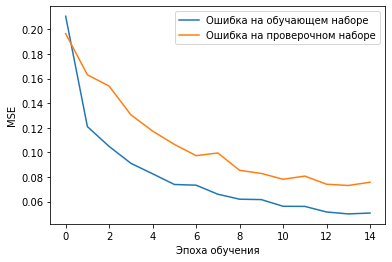

In [ ]:
# Создаём сеть
model_ula = Sequential()
model_ula.add(Dense(1000, activation='relu', input_shape=(x_train.shape[1],)))
model_ula.add(Dropout(0.2))
model_ula.add(Dense(100, activation='relu'))
model_ula.add(Dense(1, activation='linear'))

model_ula.compile(optimizer=Adam(lr=0.0001), loss='mse')

# 50000 примеров будет в обучающей выборке
n_val = 50000
history = model_ula.fit(x_train[:n_val], 
                    y_train_scaled[:n_val],
                    batch_size=32,
                    epochs=15, 
                    validation_data=(x_train[n_val:], y_train_scaled[n_val:]), 
                    verbose=1)

# Отображаем графики ошибки обучения по обучающей выборке и по проверочной выборке на всех эпохах
plt.plot(history.history['loss'], label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [ ]:
# Предсказываем проверочную выборку
predict = model_ula.predict(x_test)
# Меняем масштаб обратно от нормированного к оригинальному
predict = y_scaler.inverse_transform(predict).flatten()

# Считаем среднюю цену, среднюю ошибку и средний процент ошибки
mean_delta = np.mean(abs(predict - y_test))
mean_price = np.mean(y_test)
print('Средняя ошибка: ', round(mean_delta))
print('Средняя цена: ', round(mean_price))
print('Суммарный процент ошибки: ', round(100*mean_delta/mean_price), '%', sep='')

Средняя ошибка:  68515.0
Средняя цена:  533460.0
Суммарный процент ошибки: 13.0%
